### 引入相關python模組

In [16]:
from mycnn import data
import numpy as np
import matplotlib.pyplot as plt

augdict = {
    "flip_h": True,
    "flip_v": True,
    "rotate": True,
    "hue": True,
    "saturation": True,
    "contrast": True,
    "brightness": True,
    "zoom_scale": True,
}

tra_dataset, val_dataset = data.generate_classification_dataset(
    r'D:\Datasets\DogsVsCats\train',
    shuffle=True,
    # gray=True,
    validation_split=0.2,
    **augdict
)

Class indices:
{'cats': 0, 'dogs': 1}

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.
RGB image - Data Augmentation!!!
      flip_h
      flip_v
      rotate
      hue
      saturation
      contrast
      brightness
      zoom_scale
RGB image - Data Augmentation!!!
      flip_h
      flip_v
      rotate
      hue
      saturation
      contrast
      brightness
      zoom_scale
Shuffle Data!!!


1.1641574


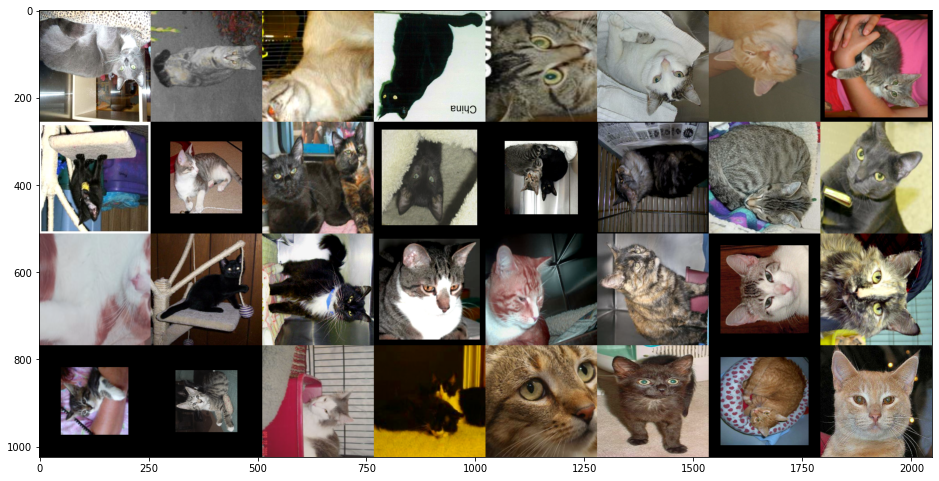

In [25]:
for x, y in tra_dataset.take(1):
    images = x.numpy()
    labels = y.numpy()
    print(np.max(images))

a = np.zeros((256*4,256*8,3))
for i in range(4):
    for j in range(8):
        a[i*256:(i+1)*256,j*256:(j+1)*256] = np.clip(images[i*8+j,::], 0, 1)

plt.figure(figsize=(16,16))
plt.imshow(a)
plt.show()